In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as plt
%matplotlib inline
import math

In [3]:
# reading data from csv file
full_data = pd.read_csv('titanic-data.csv')

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# In this analyzing, I will focus on how the gender aspect would effect the survival rate of passengers.
# My questions here are:

# 1. Which kind of gender was more survived in Titanic disaster?
    # In order to answer this question, I will split data into 2 groups: Survived and Non-Survived.
    # With the data of Survived group, display the bar chart to compare the number of Male and Female.

# 2. Would it have more chance to survived than the other?
   # I will use the answer of the 1st question to make the hypothesis and then prove it. 

# 1. Which kind of gender was more survived in Titanic disaster?

In [6]:
# just extract the data of survived passengers
# we just focus on the information in the Sex and Survived column
sex_n_survived_data = full_data[full_data['Survived'] == 1][['Survived','Sex']]
sex_n_survived_data.head()

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female


In [7]:
# grouping data by Sex, then count the values of each group
df_sex_count = sex_n_survived_data.groupby(sex_n_survived_data['Sex']).count()

In [8]:
df_sex_count

,Survived
Sex,
female,233
male,109


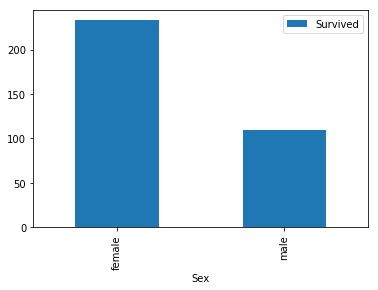

In [9]:
# display the bar chart
df_sex_count.plot.bar()

In [10]:
# So now we can see that the Female was more survived than the Male, 
# the number of female actually was more than two times of the male.  

# 2. Would Female have more chance to survived than Male?

In [11]:
# From the box and whisker plot, we can see the number of survived female is more than doubled the number of survived male. 
# Additionally with some information I collected about the Titanic disaster, 
# i guess that female would get priority to move to the lifeboats so they have more chance to survived than male.

# So my hypothesis here is: female (F) likely to have more chance to survived than male (M).

# Ho: p(F) <= p(M)
# Ha: p(F) > p(M)

# So now I'm going to perform the Z-test with two proportion in order to prove my hypothesis correct.

In [12]:
# Here are steps I'm going to do:

# 1. Spliting the full data into 2 groups: Male and Female. (just focus on the Sex and Survived data. 
# There is no NaN values in Survived and Sex column so i'm not worry about them).

# 2. For Female data: calculating the number of all passenger (n1),  the number of survived passenger (x1)
#    For Male data: calculating the number of all passenger (n2),  the number of survived passenger (x2)
#    Then calculating the proportions:
#       p(F) = x1/n1
#       p(M) = x2/n2
#       p_bar = (x1 + x2)/(n1 + n2)

# 3. Perform Hypothesis testing.   

In [13]:
######################## START 1 ##########################

In [14]:
# split that data into 2 groups: Male and Female
# and just take data of columns Survived and Sex
df_full_male = full_data[ full_data['Sex'] == 'male' ][['Survived','Sex']]
df_full_female = full_data[ full_data['Sex'] == 'female' ][['Survived','Sex']]

In [15]:
df_full_male.head()

,Survived,Sex
0,0,male
4,0,male
5,0,male
6,0,male
7,0,male


In [16]:
df_full_female.head()

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female


In [17]:
######################## END 1 ##########################

In [18]:
######################## START 2 ##########################

In [19]:
# For Female data: 

# calculating the number of all passenger (n1)
n1 = len(df_full_female)

# calculating the number of survived passenger (x1)
x1 = len( df_full_female[ df_full_female['Survived'] == 1 ])

print(x1, n1)

233 314


In [20]:
# For Male data: 

# calculating the number of all passenger (n2)
n2 = len(df_full_male)

# calculating the number of survived passenger (x2)
x2 = len( df_full_male[ df_full_male['Survived'] == 1 ])

print(x2, n2)

109 577


In [21]:
# calculating p(M), p(F), p_bar
p_hat_F = x1/n1
p_hat_M = x2/n2
p_bar = (x1+x2)/(n1+n2)

print(p_hat_F, p_hat_M, p_bar)

0.7420382165605095 0.18890814558058924 0.3838383838383838


In [22]:
######################## END 2 ##########################

In [23]:
######################## START 3 ##########################

In [24]:
# Before perform the hypothesis testing, I assume that:
#    - the sample data had been chosen randomly.
#    - all passengers had equaly chance to survive so they are independent samples.

# As we see the size of samples are n1 = 577 and n2 = 314, they are greater than 30 and are large samples so 
# the population distribution would approximately normal.
# With the assumption and large samples, i will perform the Z-test with two proportion now. 

In [25]:
# calculating the z_statistic value
z_statictic = round((p_hat_F - p_hat_M)/math.sqrt(p_bar*(1-p_bar)*(1/n1 + 1/n2)), 2)
print(z_statictic)

16.22


In [26]:
# with z_statistic = 16.22 (event not available in Z-table) then p_value < 0.0001
p_value = 0.00001

In [27]:
###################### CONCLUSION ######################

In [28]:
# At alpha level = 0.9999, since p value < 0.0001 so we REJECT THE NULL.
# That means i'm 99.99% confident to claim that the FEMALE passengers likely to have more chance to survive than MALE.
# The reason might be they are usually get the high priority during the rescuing procedure so they would have more chance to 
# survive than Male.

In [29]:
######################## END 3 ########################